In [19]:
# Load data
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = "data/train.csv"
df = pd.read_csv(CSV_PATH)

print("数据规模：", df.shape)
print(df.columns.tolist())
df.head(10)


数据规模： (1460, 81)
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Po

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
# Missing value detection
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df) * 100).round(2)
missing_table = pd.DataFrame({"missing_count": missing_counts, "missing_pct": missing_pct})
missing_table_nonzero = missing_table[missing_table["missing_count"] > 0]

print("存在缺失值的列数：", len(missing_table_nonzero))
missing_table_nonzero.head(25)


存在缺失值的列数： 19


,missing_count,missing_pct
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageFinish,81,5.55
GarageType,81,5.55


In [11]:
# Missing value imputation
df_filled = df.copy()

fill_strategies = []

for col in df_filled.columns:
    if df_filled[col].isna().sum() == 0:
        continue
    
    if df_filled[col].dtype in [np.float64, np.int64]:
        # Numerical column: Median
        fill_value = df_filled[col].median()
        df_filled[col] = df_filled[col].fillna(fill_value)
        strategy = "median"
    else:
        # Category column: Mode
        fill_value = df_filled[col].mode()[0]
        df_filled[col] = df_filled[col].fillna(fill_value)
        strategy = "mode"
    
    fill_strategies.append({"column": col, "strategy": strategy, "fill_value": fill_value})

fill_summary = pd.DataFrame(fill_strategies)
fill_summary


,column,strategy,fill_value
0,LotFrontage,median,69.0
1,Alley,mode,Grvl
2,MasVnrType,mode,BrkFace
3,MasVnrArea,median,0.0
4,BsmtQual,mode,TA
5,BsmtCond,mode,TA
6,BsmtExposure,mode,No
7,BsmtFinType1,mode,Unf
8,BsmtFinType2,mode,Unf
9,Electrical,mode,SBrkr


In [13]:
# Special handling is applied to unreasonable parts when using median imputation, see README for details
df_filled = df.copy()
fill_strategies = []

special_fill = {
    "Alley": "NA", "MasVnrType": "None", "BsmtQual": "NA", "BsmtCond": "NA",
    "BsmtExposure": "NA", "BsmtFinType1": "NA", "BsmtFinType2": "NA",
    "FireplaceQu": "NA", "GarageType": "NA", "GarageFinish": "NA",
    "GarageQual": "NA", "GarageCond": "NA", "PoolQC": "NA",
    "Fence": "NA", "MiscFeature": "NA"
}
for col, val in special_fill.items():
    if col in df_filled.columns:
        missing_before = int(df_filled[col].isna().sum())
        if missing_before > 0:
            df_filled[col] = df_filled[col].fillna(val)
            fill_strategies.append({"column": col, "strategy": "special_fill", "fill_value": val})

# GarageYrBlt: Fill missing values with 0 (meaning no garage was built).
if "GarageYrBlt" in df_filled.columns:
    missing_before = int(df_filled["GarageYrBlt"].isna().sum())
    if missing_before > 0:
        df_filled["GarageYrBlt"] = df_filled["GarageYrBlt"].fillna(0)
        fill_strategies.append({"column": "GarageYrBlt", "strategy": "special_fill", "fill_value": 0})

# Generic fill (median/mode), skip special columns.
special_cols = set(special_fill.keys()) | {"GarageYrBlt"}
for col in df_filled.columns:
    if col in special_cols:
        continue
    if df_filled[col].isna().sum() == 0:
        continue

    if pd.api.types.is_numeric_dtype(df_filled[col]):
        fill_val = df_filled[col].median()
        df_filled[col] = df_filled[col].fillna(fill_val)
        fill_strategies.append({"column": col, "strategy": "median", "fill_value": fill_val})
    else:
        mode = df_filled[col].mode(dropna=True)
        fill_val = mode.iloc[0] if len(mode) else "NA"
        df_filled[col] = df_filled[col].fillna(fill_val)
        fill_strategies.append({"column": col, "strategy": "mode", "fill_value": fill_val})

fill_summary = pd.DataFrame(fill_strategies)
fill_summary


,column,strategy,fill_value
0,Alley,special_fill,NA
1,MasVnrType,special_fill,None
2,BsmtQual,special_fill,NA
3,BsmtCond,special_fill,NA
4,BsmtExposure,special_fill,NA
5,BsmtFinType1,special_fill,NA
6,BsmtFinType2,special_fill,NA
7,FireplaceQu,special_fill,NA
8,GarageType,special_fill,NA
9,GarageFinish,special_fill,NA


In [20]:
# Check that all missing values are handled.
df_filled.isna().sum().sum()

np.int64(0)

In [23]:
# Detecting outliers in SalePrice using the Interquartile Range (IQR) method
target_col = "SalePrice"

import numpy as np
import pandas as pd

def iqr_bounds(s: pd.Series):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

num_cols = df_filled.select_dtypes(include=[np.number]).columns.tolist()

outlier_counts = []
for c in num_cols:
    s = df_filled[c].dropna()
    if s.empty:
        continue
    lo, up = iqr_bounds(s)
    cnt = int(((df_filled[c] < lo) | (df_filled[c] > up)).sum())
    outlier_counts.append((c, cnt))

outlier_table = pd.DataFrame(outlier_counts, columns=["column","outlier_count"])\
                  .sort_values("outlier_count", ascending=False)
outlier_table


,column,outlier_count
30,EnclosedPorch,208
10,BsmtFinSF2,167
5,OverallCond,125
32,ScreenPorch,116
2,LotFrontage,106
1,MSSubClass,103
8,MasVnrArea,98
18,BsmtHalfBath,82
25,GarageYrBlt,81
29,OpenPorchSF,77


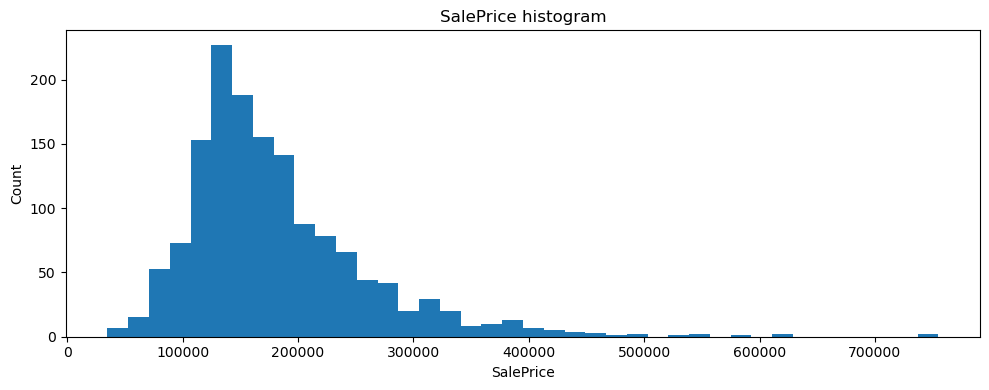

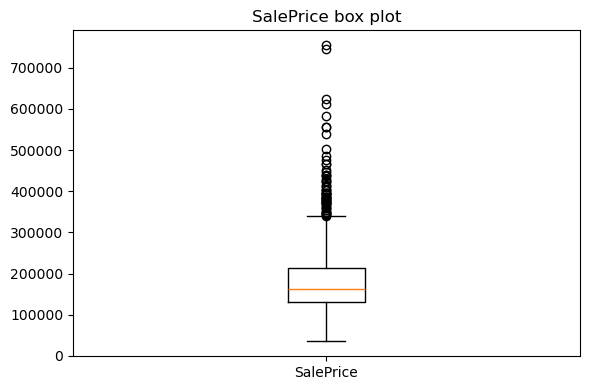

In [26]:
import os
import matplotlib.pyplot as plt

os.makedirs("figures", exist_ok=True)

# histogram
plt.figure(figsize=(10, 4))
plt.hist(df_filled[target_col].values, bins=40)
plt.title(f"{target_col} histogram")
plt.xlabel(target_col)
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/price_hist.png", dpi=150)
plt.show()

# box plot
plt.figure(figsize=(6, 4))
plt.boxplot(df_filled[target_col].values, vert=True, tick_labels=[target_col])  # 改成 tick_labels
plt.title(f"{target_col} box plot")
plt.tight_layout()
plt.savefig("figures/price_boxplot.png", dpi=150)
plt.show()


In [31]:
df_wins = df_filled.copy()

num_cols = df_wins.select_dtypes(include=[np.number]).columns.tolist()
feat_num_cols = [c for c in num_cols if c not in [target_col, "Id"]]

df_wins[feat_num_cols] = df_wins[feat_num_cols].astype(float)

clip_rows = []
for c in feat_num_cols:
    s = df_wins[c].dropna()
    if s.empty:
        continue
    p1, p99 = s.quantile([0.01, 0.99]).values
    lower_mask = df_wins[c] < p1
    upper_mask = df_wins[c] > p99
    n_low = int(lower_mask.sum()); n_up = int(upper_mask.sum())

    df_wins.loc[lower_mask, c] = p1
    df_wins.loc[upper_mask, c] = p99

    clip_rows.append((c, float(p1), float(p99), n_low, n_up))

wins_table = (pd.DataFrame(clip_rows, columns=["column","p1","p99","n_clipped_low","n_clipped_high"])
              .sort_values("column"))
wins_table.head(20)


,column,p1,p99,n_clipped_low,n_clipped_high
12,1stFlrSF,520.00,2219.46,12,15
13,2ndFlrSF,0.00,1418.92,0,15
30,3SsnPorch,0.00,168.00,0,13
20,BedroomAbvGr,1.00,5.00,6,8
8,BsmtFinSF1,0.00,1572.41,0,15
9,BsmtFinSF2,0.00,830.38,0,15
16,BsmtFullBath,0.00,2.00,0,1
17,BsmtHalfBath,0.00,1.00,0,2
10,BsmtUnfSF,0.00,1797.05,0,15
29,EnclosedPorch,0.00,261.05,0,15


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, filter out the numeric columns
numeric_df = df_wins.select_dtypes(include=["number"])

# Compute the correlation matrix
corr_pearson = numeric_df.corr(method="pearson")[target_col].sort_values(ascending=False)
corr_spearman = numeric_df.corr(method="spearman")[target_col].sort_values(ascending=False)

print("==== Pearson Correlation Top 10 ====")
print(corr_pearson.head(10))
print("\n==== Spearman Correlation Top 10 ====")
print(corr_spearman.head(10))


==== Pearson Correlation Top 10 ====
SalePrice       1.000000
OverallQual     0.793073
GrLivArea       0.713622
GarageCars      0.646652
TotalBsmtSF     0.638587
GarageArea      0.630811
1stFlrSF        0.621984
FullBath        0.570981
TotRmsAbvGrd    0.537651
YearBuilt       0.529007
Name: SalePrice, dtype: float64

==== Spearman Correlation Top 10 ====
SalePrice      1.000000
OverallQual    0.809811
GrLivArea      0.731329
GarageCars     0.691501
YearBuilt      0.652654
GarageArea     0.649431
FullBath       0.639968
GarageYrBlt    0.634081
TotalBsmtSF    0.602747
1stFlrSF       0.575380
Name: SalePrice, dtype: float64


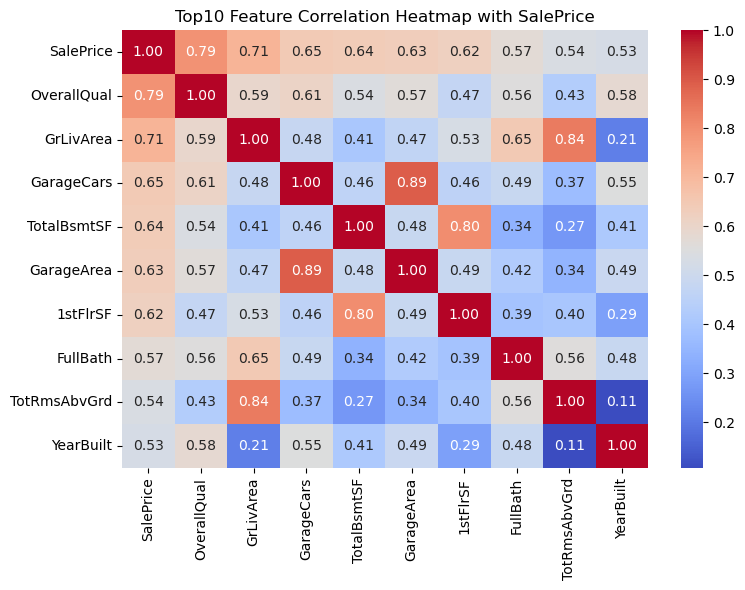

In [37]:
top10_features = corr_pearson.abs().sort_values(ascending=False).head(10).index.tolist()

if target_col in top10_features:
    cols_to_plot = top10_features
else:
    cols_to_plot = top10_features + [target_col]

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df[cols_to_plot].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top10 Feature Correlation Heatmap with SalePrice")
plt.tight_layout()
plt.savefig("figures/price_corr_heatmap.png", dpi=150)
plt.show()


In [38]:
import numpy as np
import pandas as pd

# Keep the previous variable
target_col = "SalePrice"

# Use the Winsorized data version df_wins
price = df_wins[target_col].astype(float)

price_mean = price.mean()
price_std  = price.std(ddof=0) 
df_wins["price_z"] = (price - price_mean) / price_std

print("SalePrice standardization completed:")
print(f"Mean={price_mean:.2f}, Standard deviation={price_std:.2f}")
df_wins[["SalePrice","price_z"]].head()

SalePrice standardization completed:
Mean=180921.20, Standard deviation=79415.29


,SalePrice,price_z
0,208500,0.347273
1,181500,0.007288
2,223500,0.536154
3,140000,-0.515281
4,250000,0.869843


In [39]:
# Equal-frequency binning (quartiles)
qcut_labels = ["Low", "MidLow", "MidHigh", "High"]
df_wins["price_bin_q4"] = pd.qcut(df_wins[target_col], q=4, labels=qcut_labels)

print("=== Equal-frequency quartile binning count ===")
print(df_wins["price_bin_q4"].value_counts().sort_index())
print("\n=== Quartile thresholds ===")
print(df_wins[target_col].quantile([0.25,0.5,0.75]).rename("threshold"))

=== Equal-frequency quartile binning count ===
price_bin_q4
Low        365
MidLow     367
MidHigh    366
High       362
Name: count, dtype: int64

=== Quartile thresholds ===
0.25    129975.0
0.50    163000.0
0.75    214000.0
Name: threshold, dtype: float64


In [44]:
# Save the final preprocessed results
OUTPUT_PATH = "data/train_processed.csv"
df_wins.to_csv(OUTPUT_PATH, index=False)
print(f"Data has been saved to {OUTPUT_PATH}")

Data has been saved to data/train_processed.csv
